**Importing Modules**

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')


import matplotlib
%matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt

import gensim
import nltk
import string

#stop-words
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))

# tokenizing
from nltk import word_tokenize,sent_tokenize 

#word2vec
from gensim.models import Word2Vec  

# corpus
from nltk.corpus import gutenberg

**CREATING RANDOM SAMPLE TEXT**

Here I am using a random text from the nltk corpora.

In [4]:
# sample_text=gutenberg.raw(gutenberg.fileids('shakespeare-hamlet.txt'))
# print(len(sample_text))

sample_text=gutenberg.raw('austen-emma.txt')
type(sample_text)

str

In [5]:
print(sample_text)  # we will use this to see.

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

**TOKENIZING THE TEXT (as required by the w2v model)**

In [6]:
'''

tokenizing into sentences. 
we will further tokenize this in words and store evry sentence as a list item. 
thus we will have a list of list whre each item is a list of words in a particular sentence. 

'''
sentences=nltk.sent_tokenize(sample_text)
#print(sentences,"\n")
print("Number of sentences:",len(sentences))  # 9 sentences.

Number of sentences: 7493


In [7]:
token_sent=[]
for sent in sentences:
    sent.translate(string.punctuation)
    words=nltk.word_tokenize(sent)
    words=[w for w in words if w not in stop_words]
    token_sent.append(words)

In [8]:
#print(token_sent) list of list of words. each elemnt in main list is a sentence and in inner list is a word of corressponding sentence.
print(len(token_sent))

7493


**Creating and Training the model on our corpus**

In [9]:
w2v_model=Word2Vec(token_sent,size=100,min_count=1,window=10,sg=1,hs=0,seed=42,workers=4)

In [10]:
w2v_model.train(token_sent,total_examples=len(token_sent),epochs=10)

(814873, 1125370)

**List of Words in Vocabulary**

In [11]:
# vocabulary 
vocab=list(w2v_model.wv.vocab)
print(type(vocab))
print(vocab)

<class 'list'>
['[', 'Emma', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'Woodhouse', ',', 'handsome', 'clever', 'rich', 'comfortable', 'home', 'happy', 'disposition', 'seemed', 'unite', 'best', 'blessings', 'existence', ';', 'lived', 'nearly', 'twenty-one', 'years', 'world', 'little', 'distress', 'vex', '.', 'She', 'youngest', 'two', 'daughters', 'affectionate', 'indulgent', 'father', 'consequence', 'sister', "'s", 'marriage', 'mistress', 'house', 'early', 'period', 'Her', 'mother', 'died', 'long', 'ago', 'indistinct', 'remembrance', 'caresses', 'place', 'supplied', 'excellent', 'woman', 'governess', 'fallen', 'short', 'affection', 'Sixteen', 'Miss', 'Taylor', 'Mr.', 'family', 'less', 'friend', 'fond', 'particularly', 'Between', '_them_', 'intimacy', 'sisters', 'Even', 'ceased', 'hold', 'nominal', 'office', 'mildness', 'temper', 'hardly', 'allowed', 'impose', 'restraint', 'shadow', 'authority', 'passed', 'away', 'living', 'together', 'mutually', 'attached', 'liked', 'high

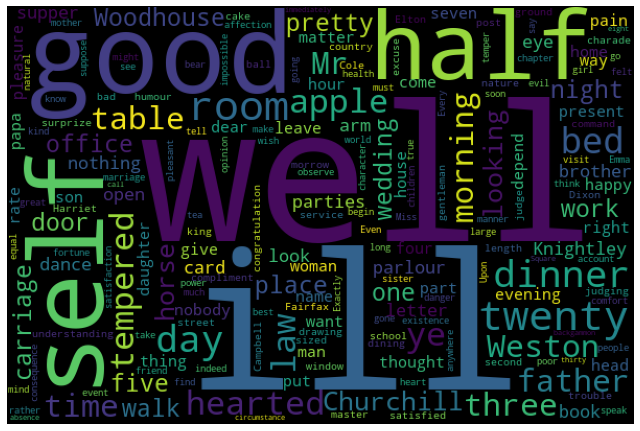

In [12]:
# visualizing our vocab with a word cloud.
from wordcloud import WordCloud
# Generate a word cloud image for positive reviews
str=''
for strings in vocab:
     str=str+strings+' '
polarity_pos_wordcloud = WordCloud(width=600, height=400).generate(str)
plt.figure( figsize=(9,9))
plt.imshow(polarity_pos_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

**Embedding for a particular word**

In [13]:
# vector of a particular model. note that it is 100 dimensional as specified.
w2v_model.wv.get_vector('little')

array([ 0.36667013, -0.19108589,  0.11777817,  0.13935372,  0.45940855,
       -0.22702132, -0.16411453, -0.51376456, -0.8677097 ,  0.26599216,
        0.30435044, -0.29627672, -0.38537133,  0.3561443 ,  0.04468083,
        0.05851504,  0.5805016 , -0.254862  , -0.2621334 , -0.7886105 ,
        0.3778309 , -0.0783869 , -0.00229936,  0.08624306, -0.03313103,
        0.4833167 , -0.744448  ,  0.5947539 , -0.24672535, -0.31041005,
        0.5269688 ,  0.00758369,  0.31319678,  0.22742505, -0.3630455 ,
        0.58410114, -0.3465619 ,  0.3509321 ,  0.48697403, -0.33467743,
        0.21323763,  0.5884982 , -0.02650596, -0.5732493 , -0.08790311,
        0.35156357,  0.268991  ,  0.29350296,  0.19306184, -0.5698231 ,
        0.5003984 , -0.13619833, -0.36723915, -0.00508527,  0.13380276,
       -0.1924261 ,  0.10160737,  0.47865185, -0.0916137 ,  0.44478324,
       -0.32423306,  0.29240644, -0.20022358,  0.12300166,  0.1752615 ,
        0.24216688,  0.39951226,  0.29144207, -0.01597421,  0.67

In [14]:
# can also do like this.
w2v_model.wv.word_vec('Taylor')

array([ 0.16980726, -0.15059891,  0.00299107,  0.09640802,  0.2882629 ,
        0.10310883,  0.08982617,  0.4787727 , -0.17780073, -0.04769279,
       -0.01374422, -0.00934379,  0.37043214,  0.25027308,  0.05384065,
       -0.3156146 , -0.30860835, -0.2420208 ,  0.09430535,  0.4552154 ,
        0.08668249, -0.40473193, -0.2575173 , -0.27542657,  0.21616669,
        0.3595372 , -0.10776393, -0.09821007,  0.22852802, -0.1978877 ,
        1.0335913 , -0.1816763 , -0.28998274,  0.37612498, -0.388017  ,
        0.1596595 ,  0.01373041, -0.5592106 , -0.06929575, -0.49408492,
       -0.7995255 , -0.39212215, -0.644332  , -0.01414032,  0.20959753,
        0.36379993,  0.18884955,  0.17932895,  0.15672408, -0.07605374,
        0.36879   , -0.20176701, -0.3554134 ,  0.44263557, -0.136282  ,
        0.32082462,  0.05698234,  0.17551875,  0.2833898 , -0.11377455,
       -0.01751943, -0.06718333,  0.21274804,  0.1152705 ,  0.08615319,
       -0.0604935 ,  0.44444564,  0.53270465,  0.14887924,  0.13

**Most similar words to a given word**

In [15]:
# most similar words to a given word
w2v_model.wv.most_similar('Miss',topn=10)

# also u can use
#w2v_model.wv.similar_by_word('Miss',topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Bates', 0.7137035727500916),
 ('niece', 0.6934076547622681),
 ('Woodhouse.', 0.6869076490402222),
 ('Coxes', 0.6860311627388),
 ('entreat', 0.6783360838890076),
 ('Taylor', 0.6762093305587769),
 ('collection', 0.6736947894096375),
 ('Nash', 0.6672382354736328),
 ('Otway', 0.6639791131019592),
 ('quitted', 0.6593644022941589)]

**Similarity b/w two given Words**

In [16]:
# simalarity between two words
w2v_model.wv.similarity('beloved','friend')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.41596094

In [17]:
# simalarity between two words. dissimilar words
w2v_model.wv.similarity('equal','gentle')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.5288962

In [18]:
# simalarity between two SAME words
w2v_model.wv.similarity('equal','equal')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


1.0

**Saving and Loading(reusing) the model**

In [19]:
# saving the model
w2v_model.save('w2v_model.pickle')
model = Word2Vec.load('w2v_model.pickle')

# summary of the word2vec model
print(model)
print(w2v_model)

# save_word2vec_format can also be used.

Word2Vec(vocab=8344, size=100, alpha=0.025)
Word2Vec(vocab=8344, size=100, alpha=0.025)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
